# Unsupervised learning  
## PCA

Let $\{X_i\}$ for $i=1,\ldots,n$ be $p$ random vectors with means
$(0,\ldots,0)^t$ and variance matrix $\Sigma$. Consider finding $v_1$,
a $p$ dimensional vector with $||v_1|| = 1$ so that $v_1^t \Sigma v_1$
is maximized. Notice this is equivalent to saying we want to maximize
$\mathrm{Var}( X_i^t V_1)$. The well known solution to this equation
is that $v_1$ is the first eigenvector of $\Sigma$ and $\lambda_1 =
\mathrm{Var}( X_i^t V_1)$ is the associated eigenvalue. If $\Sigma =
V^t \Lambda V$ is the eigenvalue decomposition of where $V$ are the
eigenvectors and $\Lambda$ is a diagonal matrix of the eigenvalues
ordered from greatest to least, then $v_1$ corresponds to the first
column of $V$ and $\lambda_1$ corresponds to the first element of
$\Lambda$. If one then finds $v_k$ as the vector maximizing $v_k^t
\Sigma v_k$ so that $v_k^t v_{k'} = I(k=k')$, then the $v_k$ are the
columns of $V$ and $v_k^t \Sigma v_k = \lambda_k$ are the eigenvalues.

Notice:

1. $V \Sigma V^t = \Lambda$ (i.e. $V$ diagonalizess $\Sigma$)
2. $\mbox{Trace}(\Sigma) = \mbox{Trace}(\Sigma V^t V) = \mbox{Trace}(V \Sigma V^t) = \sum \lambda_k$ (i.e. the total variability is the sum of the eigenvalues)
3. Since $V^t V = I$, $V$ is a rotation matrix. Thus, $V$ rotates $X_i$ in such a way that to maximize variability in the first dimension, then the second dimensions ...
4. $\mbox{Cov}(X_i^t v_k, x_i^t v_{k'} )= \mbox{Cov}(X_i^t v_k, x_i^t v_{k'} )
v_k^t \mbox{Cov}(x_i, x_i^t) v_{k'} =  v_k^t V v_{k'} = 0$ if $k\neq k'$
5. Another representation of $\Sigma$ is $\sum_{k=1}^p \lambda_i v_k v_k^t$ by simply rewriting the matrix algebra of $V \Lambda V^t$.
6. The variables $U_i = V X_i$ then: have uncorrelated elements ($\mbox{Cov}(U_{ik}, U_{ik'}) = 0$ for $k\neq k'$ by property 5), have the same total variability as the elements of $X_i$ ($\sum_k \mbox{Var}(U_{ik}) = \sum_k \lambda_k = \sum_k \mbox{Var}(X_{ik})$ by property 2), are a rotation of the $X_i$, are ordered so that $U_{i1}$ has the greatest amount of variability and so on.  

Notation:

1. The $\lambda_k$ are simply called the eigenvalues or principal components variation.
2. $U_{ik} = X_i^t v_k$ is called the **principal component scores**.
3. The $v_k$ are called the **principal component loadings** or **weights**, with $v_1$ being called the first principal component and so on.

Statistical properties under the assumption that the $x_i$ are iid with mean 0 and variance $\Sigma$

1. $E[U_{ik}]=0$
2. $\mbox{Var}(U_{ik}) = \lambda_k$
3. $\mbox{Cov}(U_{ik}, U_{ik'}) = 0$ if $k\neq k'$
4. $\sum_{k=1}^p \mbox{Var}(U_{ik}) = \mbox{Trace}(\Sigma)$.
5. $\prod_{k=1}^p \mbox{Var}(U_{ik}) = \mbox{Det}(\Sigma)$

### Sample PCA

Of course, we're describing PCA as a conceptual process. We realize
$n$ $p$ dimensional vectors $x_1$ to $x_n$, typically organized in $X$
a $n\times p$ matrix. If $X$ is not mean 0, we typically demean it by
calculating $(I- J(J^t J)^{-1} J') X$ where $J$ is a vector of
ones. Assume this is done. Then $\frac{1}{n-1} X^t X = \hat
\Sigma$. Thus, our sample PCA is obtained via the eigenvalue
decomposition $\hat \Sigma = \hat V \hat \Lambda \hat V^t$ and our
principal components obtained as $ X V$.

We can relate PCA to the SVD as follows. Let $\frac{1}{\sqrt{n-1}} X =
\hat U \hat \Lambda^{1/2} \hat V^t$ be the SVD of the scaled version
of $X$. Then note that $$ \hat \Sigma = \frac{1}{n-1} X^t X = \hat V
\hat \Lambda \hat V^t $$ yields the sample covariance matrix
eigenvalue decomposition.


### PCA with a large dimension

Consider the case where one of $n$ or $p$ is large. Let's assume $n$ is large. Then
$$
\frac{1}{n-1} X^t X = \frac{1}{n-1} \sum_i x_i x_i^t
$$
As we learned in the chapter on HDF5, we can do sums like these without loading the entirety of $X$ into memory. Thus, in this case, we can calculate the eigenvectors using only the small dimension. If, on the other hand, $p$ is large and $n$ is smaller, then we can calculate the
eigenvalue decomposition of
$$
\frac{1}{n-1} X X^t = \hat U \hat \Lambda \hat U^t.
$$
In either case, whether $U$ or $V$ is easier to get, we can then obtain the other via vectorized multiplication.


### Simple example

In [3]:
!pip install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117030 sha256=a9d86b8dde0112684844d3f658d0bd18b829b505f609bdd0ad82c7064836adac
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
from sklearn.decomposition import PCA
import urllib.request
import PIL
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.utils.data as data
from torch.utils.data import TensorDataset, DataLoader
from sklearn.decomposition import FastICA
from tqdm import tqdm
import medmnist
from medmnist import INFO, Evaluator
import scipy
import IPython

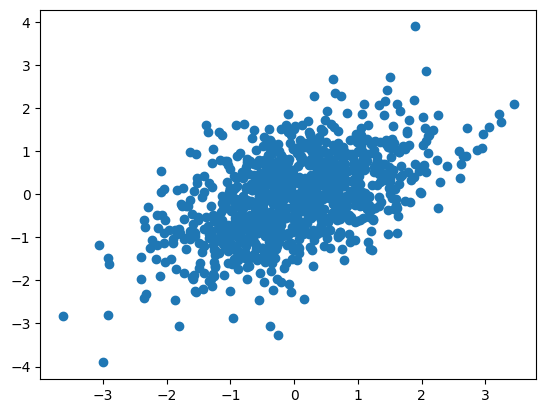

In [7]:
n = 1000
mu = (0, 0)
Sigma = np.array([[1, .5], [.5, 1]])
X = np.random.multivariate_normal( mean = mu, cov = Sigma, size = n)

plt.scatter(X[:,0], X[:,1])

In [8]:
X = X - X.mean(0)
print(X.mean(0))
Sigma_hat = np.matmul(np.transpose(X), X) / (n-1)
Sigma_hat

[ 2.24265051e-17 -8.43769499e-17]


array([[1.05417652, 0.51662038],
       [0.51662038, 0.93510727]])

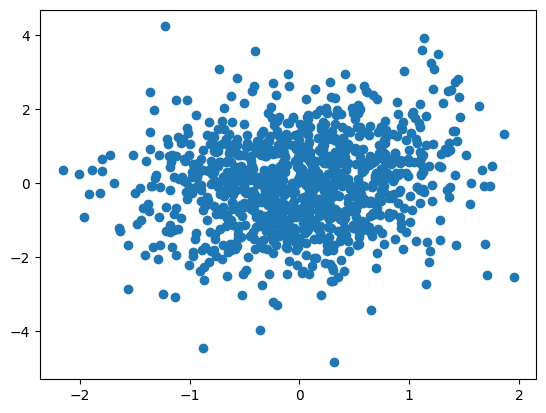

In [9]:
evd = la.eig(Sigma_hat)
lambda_ = evd[0]
v_hat = evd[1]
u_hat = np.matmul(X, np.transpose(v_hat))
plt.scatter(u_hat[:,0], u_hat[:,1])

Fit using scikitlearn's function

In [10]:
pca = PCA(n_components = 2).fit(X)
print(pca.explained_variance_)
print(lambda_ )

[1.5146813  0.47460249]
[1.5146813  0.47460249]


### Example

Let's consider the melanoma dataset that we looked at before. First we read in the data as we have done before so we don't show that code.

In [11]:
#| echo: false
data_flag = 'dermamnist'

## This defines our NN parameters
NUM_EPOCHS = 10
BATCH_SIZE = 128
lr = 0.001

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

##https://github.com/MedMNIST/MedMNIST/blob/main/examples/getting_started.ipynb
data_flag = 'dermamnist'

data_transform = transforms.Compose([

  transforms.ToTensor()

])
DataClass = getattr(medmnist, info['python_class'])

# load the data
train_dataset = DataClass(split = 'train', transform = data_transform, download = True)
test_dataset  = DataClass(split = 'test' , transform = data_transform, download = True)
pil_dataset   = DataClass(split = 'train',                             download = True)

train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

100%|██████████| 19725078/19725078 [00:19<00:00, 989528.07it/s] 


Using downloaded and verified file: /root/.medmnist/dermamnist.npz
Using downloaded and verified file: /root/.medmnist/dermamnist.npz


Next, let's get the data from the torch dataloader format back into an
image array and a matrix with the image part (28, 28, 3) vectorized.

In [14]:
def loader_to_array(dataloader):
  ## Read one iteration to get data
  test_input, test_target = next(iter(dataloader))
  ## Total number of training images
  n = np.sum([inputs.shape[0] for inputs, targets in dataloader])
  ## The dimensions of the images
  imgdim = (test_input.shape[2], test_input.shape[3])
  images = np.empty( (n, imgdim[0], imgdim[1], 3))

  ## Read the data from the data loader into our numpy array
  idx = 0
  for inputs, targets in dataloader:
    inputs = inputs.detach().numpy()
    for j in range(inputs.shape[0]):
      img = inputs[j,:,:,:]
      ## get it out of pytorch format
      img = np.transpose(img, (1, 2, 0))
      images[idx,:,:,:] = img
      matrix = images.reshape(n, 3 * np.prod(imgdim))
      idx += 1
  return images, matrix

train_images, train_matrix = loader_to_array(train_loader)
test_images, test_matrix = loader_to_array(test_loader)

## Demean the matrices
train_mean = train_matrix.mean(0)
train_matrix = train_matrix - train_mean
test_mean = test_matrix.mean(0)
test_matrix = test_matrix - test_mean

Now let's actually perform PCA using scikitlearn. We'll plot the
eigenvalues divided by their sums, $\lambda_k / \sum_{k'}
\lambda_{k'}$. This is called a scree plot.

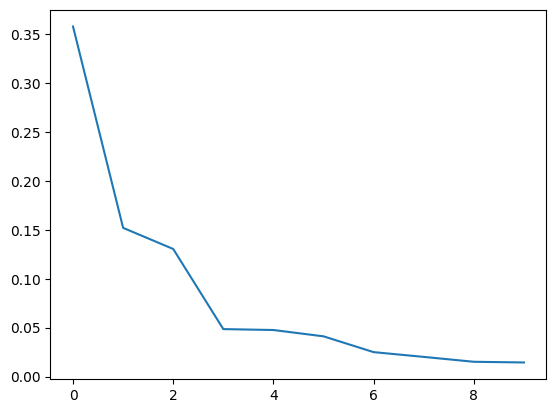

In [13]:
from sklearn.decomposition import PCA
n_comp = 10
pca = PCA(n_components = n_comp).fit(train_matrix)
plt.plot(pca.explained_variance_ratio_)

Often this is done by plotting the cummulative sum so that you can
visualize how much variance is explained by including the top $k$
components. Here I fit 10 components and they explain 85% of the
variation.

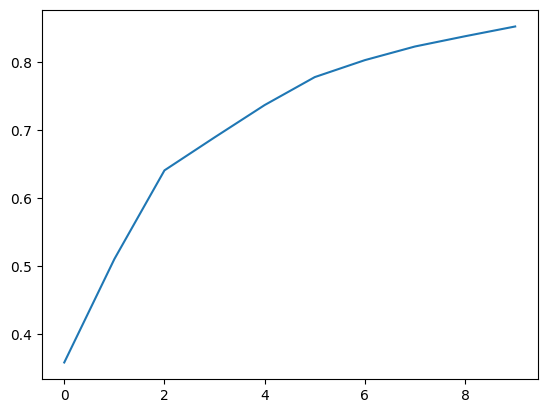

In [15]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

Note that the weights from the eigenvectors, $V$, are images. We can
plot these as images.

In [16]:
eigen_moles = pca.components_

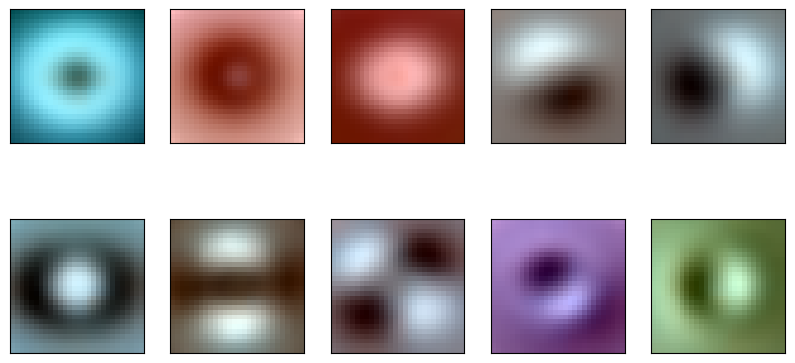

In [17]:
#| echo: false
plt.figure(figsize=(10,5))
for i in range(10):
  plt.subplot(2, 5,i+1)
  plt.xticks([])
  plt.yticks([])
  img = eigen_moles[i,:].reshape(28, 28, 3)
  img = (img - img.min())
  img = img / img.max()
  img = img * 255
  img = img.astype(np.uint8)
  plt.imshow(img)

Let's project our testing data onto the principal component basis
created by our training data and see how it does. Let $X_{training} =
U \Lambda^{1/2} V^t$ is the SVD of our training data.  Then, we can
convert ths scores, $U$ back to $X_{training}$ with the map $U
\rightarrow U \lambda^{1/2} V$. Or, if our scores are normalized, $U
\Lambda^{1/2}$ then we simply multiply by $V^t$. If we want to
represent $X_{training}$ by a lower dimensional summary, we just keep
fewer columns of scores, then multiply by the same columns of $V$. We
could write this as $U_s = X_{training} V_S \lambda^{-1/2}_S$, where
$S$ refers to a subset of values of $k$.

Notice that
$\hat X_{training} = U_{S} V^t_S \Lambda^{-1/2}_S = X_{training} V_S V_S^t$ , $\Lambda$ and $V$. Consider then an approximation to $X_{test}$ as
$\hat X_{test} = X_{test} V_s V_S^t$. Written otherwise
$$
\hat X_{i,test} = \sum_{k \in S} <x_{i,test}, v_k> v_k
$$
which is the projection of subject $i$'s features into the linear space spanned by the basis defined by the principal component loadings.

Let's try this on our mole data.


In [18]:
test_matrix_fit = pca.inverse_transform(pca.transform(test_matrix))
np.mean(np.abs( test_matrix - test_matrix_fit))

0.037923909227436825

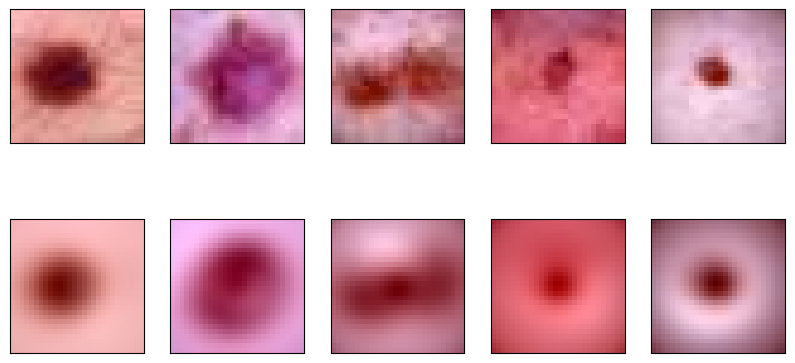

In [19]:
#| echo: false
test_matrix_fit_remeaned = test_matrix_fit + test_mean
test_matrix_remeaned = test_matrix + test_mean

plt.figure(figsize=(10,5))
for i in range(5):
  plt.subplot(2, 5,i+1)
  plt.xticks([])
  plt.yticks([])
  img = test_matrix_remeaned[i,:].reshape(28, 28, 3)
  img = (img - img.min())
  img = img / img.max()
  img = img * 255
  img = img.astype(np.uint8)
  plt.imshow(img)

  plt.subplot(2, 5,i+6)
  plt.xticks([])
  plt.yticks([])
  img = test_matrix_fit_remeaned[i,:].reshape(28, 28, 3)
  img = (img - img.min())
  img = img / img.max()
  img = img * 255
  img = img.astype(np.uint8)
  plt.imshow(img)

## ICA

ICA, independent components analysis, tries to find linear
transformations of the data that are statistically
independent. Usually, independence is an assumption in ICA, not
actually embedded in the loss function.

Let $S_t$ be an $\mathbb{R}^p$ collection of $p$ source
signals. Assume that the underlying signals are independent, so that
$S_t \sim F = F_1 \times F_2 \times \ldots \time f_p$. Assume that the
observed data is $X_t = M S_t$ and $X_t \sim G$. It is typically
assumed that $M$ is invertible so that $S_t = M^{-1} X_t$ and $M$ and
$M^{-1}$ are called the mixing and unmixing matrices
respectively. Note that, since we observe $X_t$ over many repititions
of $t$, we can get an estimate of $G$. Typically, it is also assumed
that the $X_t$ are iid over $t$.

One way to characterize the estimation problem is to parameterize
$F_1$, $F_2$ and $F_3$ and use maximum likelihood, or equivalent
[citations]. Another is to minimize some distance between $G$ and
$F_1$, $F_2$ and $F_3$. Yet another is to actually maximize
independence between the components of $S_t$ using some estimate of
independence [cite Matteson].

The most popular approaches try to find $M^{-1}$ by maximizing
non-Gaussianity. The logic goes that 1) interesting features tend to
be non-Gaussian and 2) an appeal to the CLT over signals suggest that
the mixed signals should be more Gaussian by being linear combinations
of independent things. The latter claim is heuristic relative to the
formal CLT. However, maximizing non-Gaussian components tends to work
well in practice, thus validating the motivation empirically.

One form of ICA maximizes the kurtosis. If $Y$ is a random variable,
then $E[Y^4] - 3 E[Y^2]$ is the kurtosis. One could then find $M^{-1}$
that maximizes the empirical kurtosis of the unmixed signals.  Another
variation of non-Gaussianity maximizes neg-entropy. The neg-entropy of
a density $h$ is given by $$
- \int h(y) \log(h(y)) dy = - E_h[\log h(Y)] $$ A well known theorem
states that the Gaussian distribution has the largest entropy of all
distributions with the same variance.  Therefore, to maximize
non-Gaussianity, we can minmize entropy, or equivalently maximize
neg-entropy. We could subtract the entropy of the Gaussian
distribution to consider this a cross entropy problem, but that only
adds a constant to the loss function.  The maximization of neg-entropy
can be done many ways. We need the following. For a given $M^{-1}$,
estimate $G$ from the collection $M^{-1} X_t$, then calculate the
neg-entropy of $f_j$. Use that to then take an opimization step of $M$
is the right direction.  Some versions of estimation use a polynomial
expansion of the $f_j$, which then typically only requires higher
order moments, like kurtosis.  Fast ICA is a particular
implmementation of maximizing neg-entropy.

Statistical versions of ICA don't require $M$ to be
invertible. Moreover, error terms can be added in which case you can
see the connection between ICA and factor analytic models. However,
factor analysis models tend to assume Gaussianity.

### Example
Consider an example that PCA would have somewhat of a hard time
with. In this case, our data is from a mixture of normals with half
from a normal with a strong positive correlation and half with a
strong negative correlation. Because the angle between the two is not
90 degrees PCA has no chance. No rotation of the axes satisfies the
obvious structure in this data.

(-6.0, 6.0)

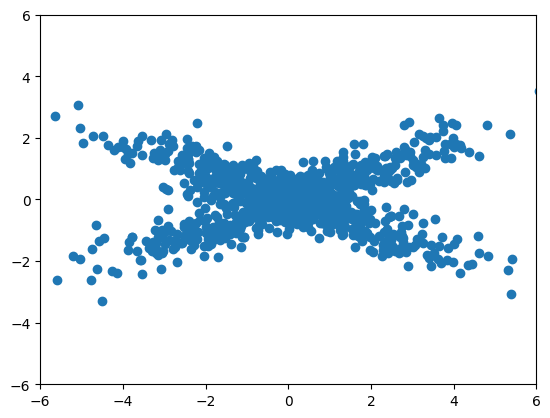

In [20]:
n = 1000

Sigma = np.array([[4, 1.8], [1.8, 1]])
a = np.random.multivariate_normal( mean = [0, 0], cov = Sigma, size = int(n/2))
Sigma = np.array([[4, -1.8], [-1.8, 1]])
b = np.random.multivariate_normal( mean = [0, 0], cov = Sigma, size = int(n/2))
x = np.append( a, b, axis = 0)
plt.scatter(x[:,0], x[:,1])
plt.xlim([-6, 6])
plt.ylim([-6, 6])

Let's try fast ICA. Notice it comes much closer to discovering the
structure we'd like to discover than PCA could. It pulls appart the
two components to a fair degree. Also note, there's a random starting
point of ICA, so that I get fairly different fits over re-runs of the
algorithm. I had to lower the tolerance to get a good fit.

Indpendent components are order invariant and sign invariant.

(-5.3930579683638555, 4.437860817741725)

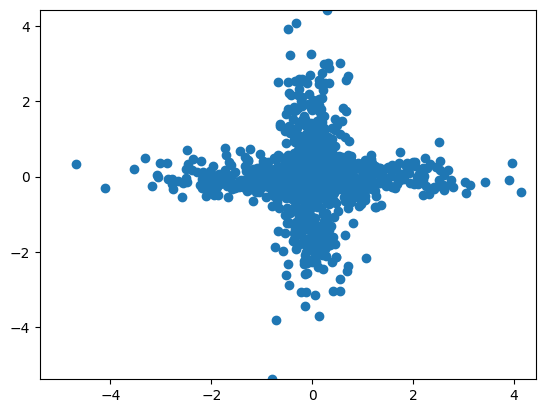

In [21]:
transformer = FastICA(tol = 1e-7)
icafit = transformer.fit(x)
s = icafit.transform(x)
plt.scatter(s[:,0], s[:,1])
plt.xlim( [s.min(), s.max()])
plt.ylim( [s.min(), s.max()])

### Cocktail party example

The classic ICA problem is the so called cocktail party problem. In
this, you have $p$ sources and $p$ microphones. The microphones each
pick up a mixture of signals from the different sources. The goal is
to unmix the sources into the components. Independence makes sense in
the cocktail party example, since logically conversations would have
some independence.


In [25]:
import audio2numpy as a2n
s1, i1 = a2n.audio_from_file("mp3s/4.mp3")
s2, i2 = a2n.audio_from_file("mp3s/2.mp3")
s3, i3 = a2n.audio_from_file("mp3s/6.mp3")

## Get everything to be the same shape and sum the two audio channels
n = np.min((s1.shape[0], s2.shape[0], s3.shape[0]))
s1 = s1[0:n,:].mean(axis = 1)
s2 = s2[0:n,:].mean(axis = 1)
s3 = s3[0:n,:].mean(axis = 1)

s = np.array([s1, s2, s3])

OSError: file not found

In [24]:
!pip install audio2numpy

  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=caa334eb59ee515df490f9d5501fee3ba3381b074c25d38f8a87898497cdbe09
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


In [ ]:
#| echo: false
IPython.display.Audio(s1, rate = i1)

In [ ]:
#| echo: false
IPython.display.Audio(s2, rate = i1)

In [ ]:
#| echo: false
IPython.display.Audio(s3, rate = i1)

Mix the signals.

In [ ]:
w = np.array( [ [.7, .2, .1], [.1, .7, .2], [.2, .1, .7] ])
x = np.transpose(np.matmul(w, s))

Here's an example mixed signal

In [ ]:
IPython.display.Audio(data = x[:,1].reshape(n), rate = i1)

Now try to unmix using fastICA

In [ ]:
transformer = FastICA(whiten=True, tol = 1e-7)
icafit = transformer.fit(x)

In [ ]:
icafit.mixing_

Unmixing matrix

In [ ]:
icafit.components_

Here's a scatterplot matrix where the real component is on the rows
and the estimated component is on the columns.

In [ ]:
hat_s = np.transpose(icafit.transform(x))

plt.figure(figsize=(10,10))

for i in range(3):
  for j in range(3):
    plt.subplot(3, 3, (3 * i + j) + 1)
    plt.scatter(hat_s[i,:].squeeze(), np.asarray(s)[j,:])

We can now play the estimated sources and see how they turned out.

In [ ]:
from scipy.io.wavfile import write
i = 0
data = (hat_s[i,:].reshape(n) / np.max(np.abs(hat_s[i,:]))) * .5
IPython.display.Audio(data = data, rate = i1)

In [ ]:
i = 1
data = (hat_s[i,:].reshape(n) / np.max(np.abs(hat_s[i,:]))) * .5
IPython.display.Audio(data = data, rate = i1)

In [ ]:
i = 2
data = (hat_s[i,:].reshape(n) / np.max(np.abs(hat_s[i,:]))) * .5
IPython.display.Audio(data = data, rate = i1)

### Imaging example using ICA

Let's see what we get for the images. Logically, one would consider
voxels as mixed sources and images as the iid replications. But, then
the sources would not be images. Let's try the other dimension and see
what we get where subject images are mixtures of source images. This
is analogous to finding a soure basis of subject images.

This is often done in ICA where people transpose matrices to
investigate different problems.

In [ ]:
transformer = FastICA(n_components=10, random_state=0,whiten='unit-variance', tol = 1e-7)
icafit = transformer.fit_transform(np.transpose(train_matrix))
icafit.shape

In [ ]:
#| echo: false

train_matrix_remeaned = train_matrix + train_mean

plt.figure(figsize=(10,5))
for i in range(10):
  plt.subplot(2, 5,i+1)
  plt.xticks([])
  plt.yticks([])
  img = icafit[:,i].reshape(28, 28, 3)
  img = (img - img.min())
  img = img / img.max()
  img = img * 255
  img = img.astype(np.uint8)
  plt.imshow(img)